<a href="https://colab.research.google.com/github/eoinleen/Biophysics-general/blob/main/Simulating_binding_various_mdls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

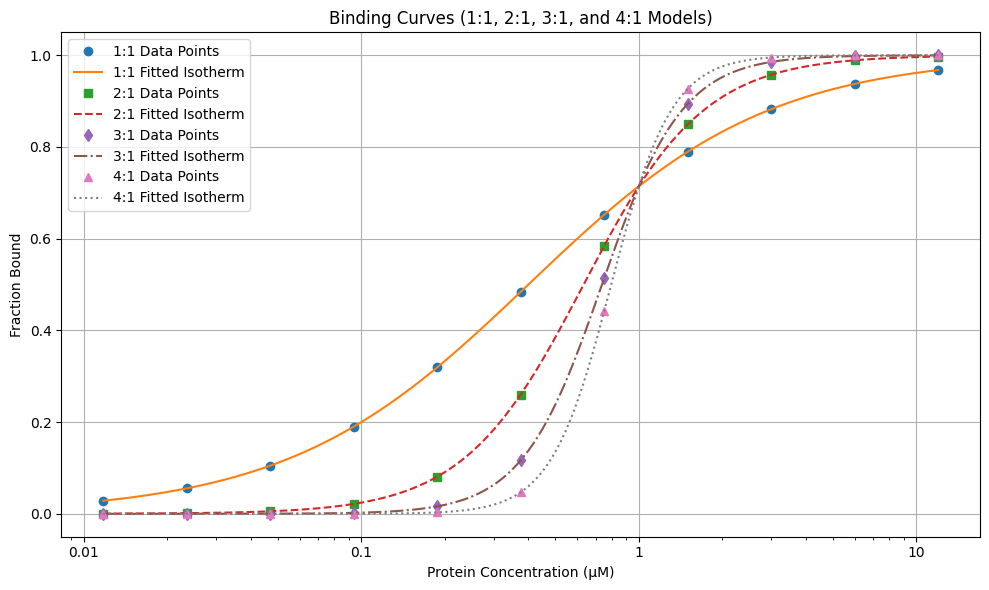

In [7]:
"""
This Python script simulates 1:1, 2:1, 3:1, and 4:1 binding curves for protein-ligand
interactions using a two-fold dilution series, starting at 12 µM.

The script includes:
1. Functions to calculate fraction bound for various models:
   - calculate_fraction_bound_1to1(p, kd)
   - calculate_fraction_bound_2to1(p, kd)
   - calculate_fraction_bound_3to1(p, kd)
   - calculate_fraction_bound_4to1(p, kd)
   - Formula: Fraction Bound = [Protein]^[n] / (Kd + [Protein]^[n])
   - Inputs: Protein concentration (p) in µM, Dissociation constant (Kd) in µM, where [n] is the stoichiometry of the binding interaction.

2. Two-fold dilution series:
   - Starting concentration: 12 µM
   - Number of steps: 11
   - Protein concentrations: [12, 6, 3, 1.5, ...] µM

3. Parameters:
   - Ligand concentration: 50 nM (0.05 µM)
   - Dissociation constant (Kd): 400 nM (0.4 µM)

4. Calculation of fraction bound for each protein concentration for all models.

5. Plotting the binding curves:
   - X-axis: Protein concentration (µM) on a logarithmic scale
   - Y-axis: Fraction Bound
   - Titles: Binding Curves with Two-Fold Dilution Series
   - Non-scientific notation for x-axis labels with two significant figures

This script was developed with the assistance of Microsoft Copilot, an AI companion created by Microsoft.
"""

import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define functions to calculate fraction bound for various models
def calculate_fraction_bound_1to1(p, kd):
    return p / (kd + p)

def calculate_fraction_bound_2to1(p, kd):
    return (p**2) / (kd + (p**2))

def calculate_fraction_bound_3to1(p, kd):
    return (p**3) / (kd + (p**3))

def calculate_fraction_bound_4to1(p, kd):
    return (p**4) / (kd + (p**4))

# Install the required package
try:
    import pybindingcurve as pbc
except ImportError:
    subprocess.check_call([os.sys.executable, "-m", "pip", "install", "pybindingcurve"])
    import pybindingcurve as pbc

# Define system parameters
start_concentration = 12  # Starting concentration in µM
dilution_steps = 11  # Number of two-fold dilution steps
protein_concentration = np.array([start_concentration / (2**i) for i in range(dilution_steps)])  # Two-fold dilution series

ligand_concentration = 0.05  # Ligand concentration in µM
kd = 0.4  # Kd for protein-ligand interaction in µM

# Calculate fraction bound for all models
fraction_bound_1to1 = calculate_fraction_bound_1to1(protein_concentration, kd)
fraction_bound_2to1 = calculate_fraction_bound_2to1(protein_concentration, kd)
fraction_bound_3to1 = calculate_fraction_bound_3to1(protein_concentration, kd)
fraction_bound_4to1 = calculate_fraction_bound_4to1(protein_concentration, kd)

# Generate a denser set of points for smooth isotherms
dense_protein_concentration = np.logspace(np.log10(min(protein_concentration)), np.log10(max(protein_concentration)), 1000)

# Fit the binding models
popt_1to1, _ = curve_fit(calculate_fraction_bound_1to1, protein_concentration, fraction_bound_1to1)
fitted_1to1 = calculate_fraction_bound_1to1(dense_protein_concentration, *popt_1to1)

popt_2to1, _ = curve_fit(calculate_fraction_bound_2to1, protein_concentration, fraction_bound_2to1)
fitted_2to1 = calculate_fraction_bound_2to1(dense_protein_concentration, *popt_2to1)

popt_3to1, _ = curve_fit(calculate_fraction_bound_3to1, protein_concentration, fraction_bound_3to1)
fitted_3to1 = calculate_fraction_bound_3to1(dense_protein_concentration, *popt_3to1)

popt_4to1, _ = curve_fit(calculate_fraction_bound_4to1, protein_concentration, fraction_bound_4to1)
fitted_4to1 = calculate_fraction_bound_4to1(dense_protein_concentration, *popt_4to1)

# Function for x-axis label formatting
def format_func(value, tick_number):
    return "{:.2g}".format(value)

# Generate combined plot
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.xlabel('Protein Concentration (µM)')
plt.ylabel('Fraction Bound')
plt.title('Binding Curves (1:1, 2:1, 3:1, and 4:1 Models)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Add data points and fitted curves for all models
plt.plot(protein_concentration, fraction_bound_1to1, 'o', label='1:1 Data Points')
plt.plot(dense_protein_concentration, fitted_1to1, '-', label='1:1 Fitted Isotherm')

plt.plot(protein_concentration, fraction_bound_2to1, 's', label='2:1 Data Points')
plt.plot(dense_protein_concentration, fitted_2to1, '--', label='2:1 Fitted Isotherm')

plt.plot(protein_concentration, fraction_bound_3to1, 'd', label='3:1 Data Points')
plt.plot(dense_protein_concentration, fitted_3to1, '-.', label='3:1 Fitted Isotherm')

plt.plot(protein_concentration, fraction_bound_4to1, '^', label='4:1 Data Points')
plt.plot(dense_protein_concentration, fitted_4to1, ':', label='4:1 Fitted Isotherm')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
